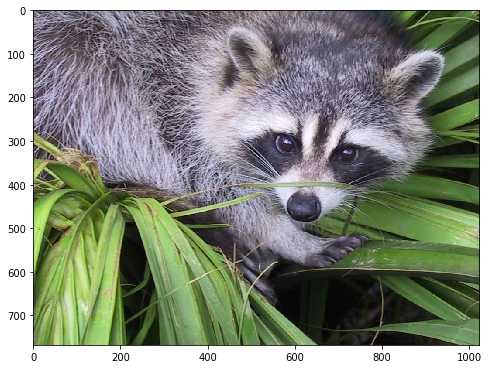

In [1]:
# TOPIC: A little image processing
# Recall that audio is just data.  It can be represented as 
# an array of numbers. Same with a color image.  It is just data, 
# given image is given by a 2D array of RGB data:
# a 3D array [red, green, blue] of integers in the range
# 0 to 255.
#
# We will use scipy and numpy for this work
# SOURCE: https://scipy-lectures.org/advanced/image_processing/index.html

# Import libraries
from scipy import misc
from scipy import ndimage
import numpy as np
import imageio
import matplotlib.pyplot as plt
%matplotlib inline

# Get a stock image from scipy's misc 
# library and save it to a file
# for later use
face = misc.face()
imageio.imwrite('face.png', face) 

# Show the images
plt.figure(figsize=(8,8))
plt.imshow(face)
plt.show()


In [2]:
type(face)

numpy.ndarray

In [3]:
face.shape, face.dtype

((768, 1024, 3), dtype('uint8'))

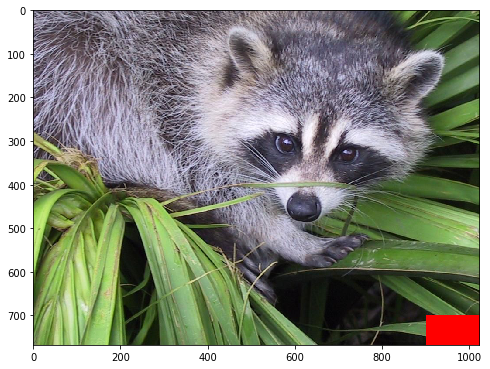

In [4]:
# We'll put a red rectangle in the 
# lower right corner of the image

face2 = np.copy(face)
face2[700:769, 900:1024] = [255,0,0]
plt.figure(figsize=(8,8))
plt.imshow(face2)

array([[116.8449, 133.8432, 149.0697, ..., 117.9671, 128.3359, 136.3351],
       [ 86.1361, 107.134 , 126.773 , ..., 116.7392, 132.7376, 144.7364],
       [ 70.1377,  91.1356, 112.1335, ..., 117.0273, 133.0257, 144.0246],
       ...,
       [ 96.8903, 101.9006, 115.2583, ..., 139.672 , 138.6721, 139.1451],
       [ 92.9015, 102.9005, 118.9698, ..., 139.2699, 138.156 , 138.156 ],
       [ 93.1295, 104.9003, 118.1979, ..., 138.27  , 137.1561, 136.1562]])

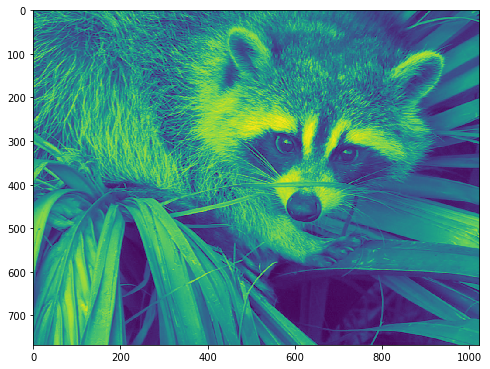

In [5]:
# Now we'll convert the racoon image to grayscale
# using a weighted average

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
face_gray = rgb2gray(face)
plt.figure(figsize=(8,8))
plt.imshow(face_gray)
face_gray

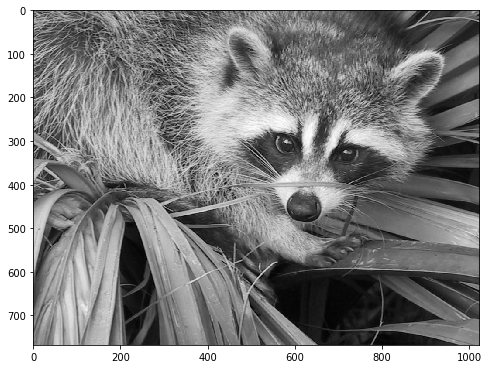

In [6]:
# Oops! Need to give plt.imshow a color map

plt.figure(figsize=(8,8))
plt.imshow(face_gray, cmap=plt.cm.gray) 

array([[121.3212, 138.3195, 153.9846, ..., 106.3227, 116.3217, 124.3209],
       [ 90.3243, 111.3222, 131.6535, ..., 104.6562, 120.6546, 132.6534],
       [ 74.3259,  95.3238, 116.3217, ..., 104.6562, 120.6546, 131.6535],
       ...,
       [ 89.6577,  94.9905, 107.6559, ..., 124.9875, 123.9876, 123.9876],
       [ 85.9914,  95.9904, 111.6555, ..., 124.6542, 123.321 , 123.321 ],
       [ 86.658 ,  97.9902, 111.3222, ..., 123.6543, 122.3211, 121.3212]])

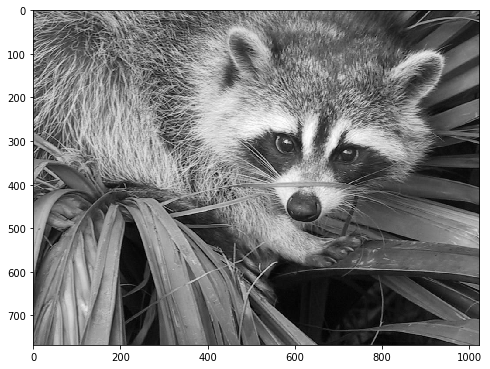

In [7]:
# Let's try the standard average

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.3333, 0.3333, 0.3333])
face_gray = rgb2gray(face)

plt.figure(figsize=(8,8))
plt.imshow(face_gray, cmap=plt.cm.gray)
face_gray

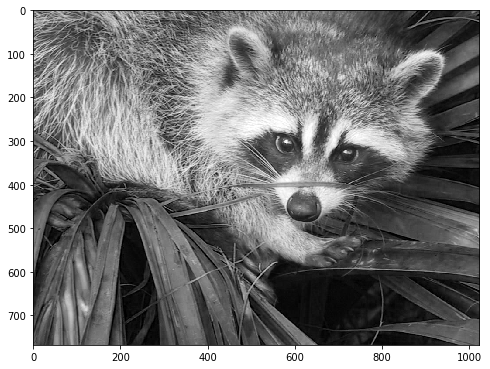

In [8]:
# Next, we make a grayscale image using only
# the blue channel

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.0, 0.0, 1.0])
face_gray = rgb2gray(face)

plt.figure(figsize=(8,8))
plt.imshow(face_gray, cmap=plt.cm.gray)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


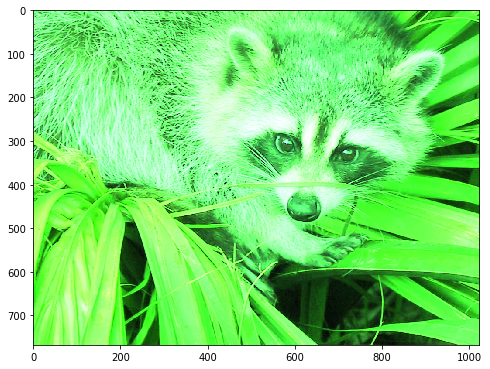

In [9]:
# Let's rescale the color

def rgb_rescale_color(rgb):
    return rgb[...,:3]*[1, 3, 1]
face_c = rgb_rescale_color(face)

plt.figure(figsize=(8,8))
plt.imshow(face_c)

In [10]:
# Finally, we are going to try to raise
# the contrast in the grayscale image.
# First step: get the maximum and minimum values

print(face_gray.shape)
gs = np.copy(face_gray).flatten()
min(gs), max(gs), gs


(768, 1024)


(0.0, 255.0, array([131., 148., 165., ...,  95.,  93.,  92.]))

In [19]:
a = 30; b = 225
m = 255/(b - a)
def rescale(x):
    xx = m*(x -a)
    if xx < 0:
        return 0
    elif xx > 255:
        return 255
    else:
        return xx
    
rescale_v = np.vectorize(rescale)
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.vectorize.html

gs2 = rescale_v(gs)
min(gs2), max(gs2), gs2

(0.0,
 255.0,
 array([132.07692308, 154.30769231, 176.53846154, ...,  85.        ,
         82.38461538,  81.07692308]))

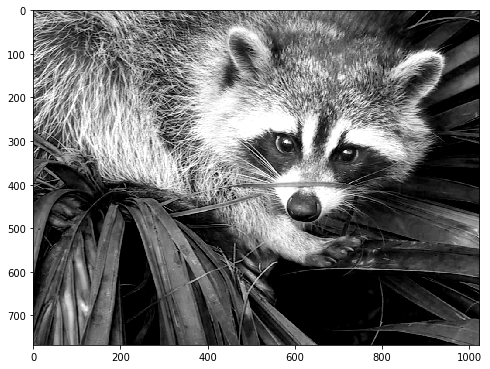

In [20]:
gs3 = gs2.reshape(768, 1024)

plt.figure(figsize=(8,8))
plt.imshow(gs3, cmap=plt.cm.gray)
# plt.imshow(face_gray, cmap=plt.cm.gray) 


In [21]:
bin_data = np.arange(0,256, 1)
bin_data

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [22]:
hist = np.histogram(gs, bins=bin_data)
type(hist)
freq = hist[0]
bin = hist[1]
bin, freq

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

(256, 255)

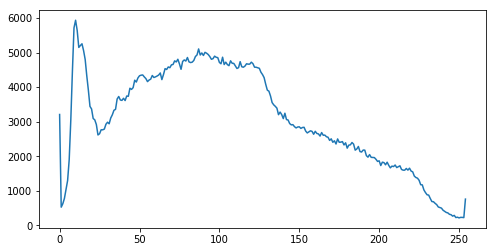

In [23]:
plt.figure(figsize=(8,4))
plt.plot(bin[:-1], freq)
len(bin), len(freq)

In [16]:
freq[ 10:30]

array([5933, 5638, 5147, 5202, 5252, 5055, 4798, 4326, 3909, 3441, 3367,
       3092, 3052, 2916, 2615, 2651, 2765, 2764, 2786, 2926])

In [17]:
list(freq).index(2786)

28

(256, 255)

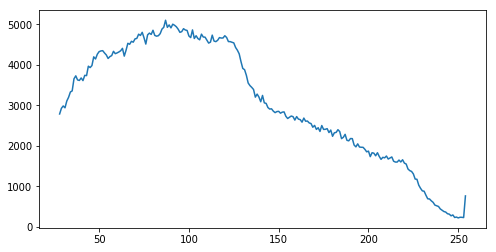

In [18]:
plt.figure(figsize=(8,4))
plt.plot(bin[28:-1], freq[28:])
len(bin), len(freq)